# Different rdkit version can have differnt columns

## Problem statment

From the image below (deepchem documentation), you could see that the shape of rdkit (DeepChem=2.8.1) is 210. However, some previous version of deepchem and rdkit can give you 208 or 209 columns of rdkit descriptor. This notebook will guide to downgrade our deepchem and rdkit to the version that can generate 208 rdkit descriptor. 
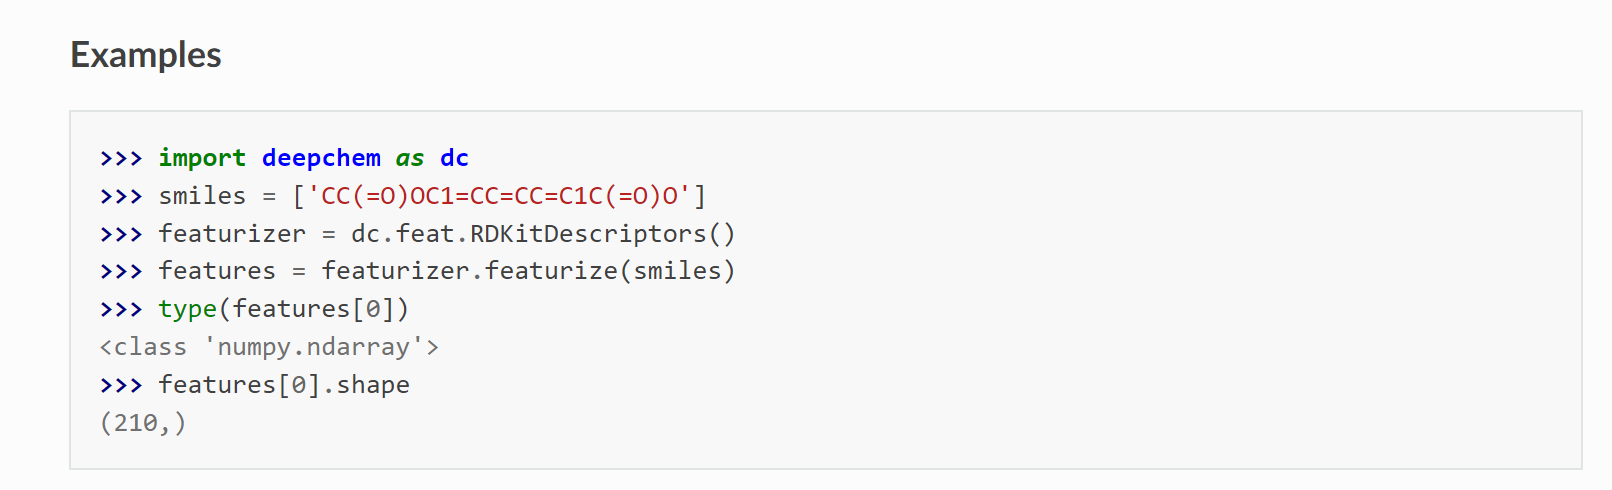

The method I used is to downgrade the rdkit package

## Build env install correct version packages

In your anaconda prompt, create a new env and activate it, we need python version 3.7
```terminal
conda create -n newEnv python=3.7
conda activate newEnv
```

In your anaconda prompt and newEnv, Install the following:
```terminal
pip install tensorflow
pip install deepchem==2.7.1
pip install rdkit==2022.09.3
```
The deepchem should install a rdkit, but we need to downgrade to rdkit 2022.09.3, so you can have 208 rdkit descriptors otherwise the output should 209 rdkit descriptors. Describe the version of rdkit is important in the code!!!

# Testing and version check

In [7]:
import platform
print("python version: ", platform.python_version())

python version:  3.7.16


In [8]:
# import packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

print("tf version: ", tf.__version__)
print("keras version: ", keras.__version__)
print("np version: ", np.__version__)
print("pd version: ", pd.__version__)

tf version:  2.10.0
keras version:  2.10.0
np version:  1.21.5
pd version:  1.3.5


In [9]:
import deepchem as dc

print("deepchem version: ", dc.__version__)

Skipped loading some PyTorch models, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'torch'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


deepchem version:  2.7.1


In [10]:
import rdkit

print("rdkit version", rdkit.__version__)

rdkit version 2022.09.3


In [11]:
# SMILEs to RDkit descriptor and fingerprint
smiles="CC(=O)OC1=CC=CC=C1C(=O)O"

rdkit = dc.feat.RDKitDescriptors().featurize(smiles)
fingerprint = dc.feat.CircularFingerprint(size=2048, radius=4).featurize(smiles)

print("Shape of RDKit descriptors:", len(rdkit[0]))
print("Shape of fingerprint:", len(fingerprint[0]))

Shape of RDKit descriptors: 208
Shape of fingerprint: 2048


So look at the RDKit descriptor above in the output cell! It becomes 208 instead of 210 in the image above (deepchem doc)!!!

## Important lesson from here

**Knowing your package version is very important. It's better to include the version in the notebook for convenience!!!**
Note that this method has a drawback, like other packages probably need to downgrade either~